In [1]:
import numpy as np
from catboost import CatBoostRegressor
import ROOT as rt
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

Welcome to JupyROOT 6.14/04


In [2]:
s = "dataset/eplus-flat_1M_simple.root"
rf = rt.TFile(s,"read")
evt_tree = rf.Get("evt")
features = []
energies = []
radius = []

In [3]:
for i, evt in enumerate(evt_tree):
	if (evt.r<17200) :
		features.append([evt.totalPE_lpmt , evt.cohX, evt.cohY, evt.cohZ, evt.ht_mean - evt.ht1])
		energies.append(evt.E0+0.511)

In [28]:

test_dts = features[820000:820500]
labels = energies[820000:820500]

#load models
model = CatBoostRegressor()
model.load_model("models/time_FV.model")


In [29]:
predictions = model.predict(test_dts)
predictions += 0.511

In [30]:
print(np.mean(predictions))


5.7901334575462355


In [37]:
h = []
for i in range(len(predictions)):
	h.append((predictions[i]-labels[i])/labels[i])

print(np.mean(h), np.std(h))

0.0012136563357466954 0.017806037907077313


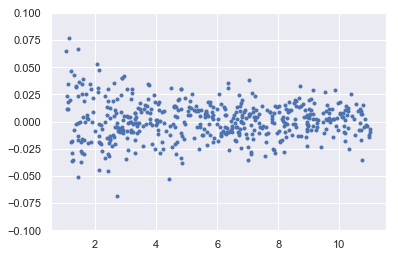

In [44]:
plt.plot(labels,h, 'b.')
plt.ylim(-0.1,0.1)
plt.savefig('prova.png', dpi=100)

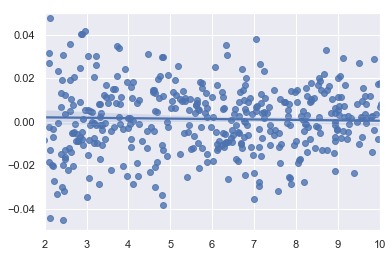

In [36]:
sns.set(color_codes=True)
plt.ylim(-0.05,0.05)
plt.xlim(2,10)
sns.regplot(labels, h)